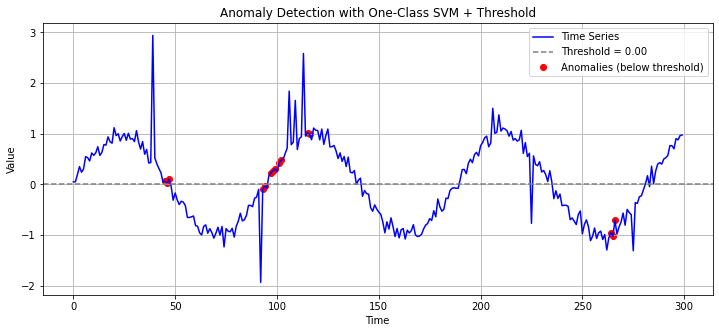

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic time series with some anomalies
np.random.seed(42)
n = 300
normal_data = np.sin(np.linspace(0, 20, n)) + 0.1 * np.random.randn(n)
anomalies = np.random.uniform(low=-3, high=3, size=10)
anomaly_indices = np.random.choice(n, 10, replace=False)
time_series = normal_data.copy()
time_series[anomaly_indices] = anomalies

# 2. Prepare rolling window features
window_size = 10
X = []
indices = []

for i in range(len(time_series) - window_size):
    X.append(time_series[i:i+window_size])
    indices.append(i + window_size)

X = np.array(X)

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Fit One-Class SVM
model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
model.fit(X_scaled)

# 5. Get decision function scores
scores = model.decision_function(X_scaled)  # Higher = more normal
threshold = np.quantile(scores, 0.05)       # Set threshold at 5th percentile

# 6. Flag anomalies based on threshold
anomaly_flags = np.where(scores < threshold)[0]

# 7. Plot the results
plt.figure(figsize=(12, 5))
plt.plot(time_series, label='Time Series', color='blue')
plt.scatter([indices[i] for i in anomaly_flags],
            time_series[[indices[i] for i in anomaly_flags]],
            color='red', label='Anomalies (below threshold)')
plt.axhline(y=threshold, color='gray', linestyle='--', label=f"Threshold = {threshold:.2f}")
plt.title("Anomaly Detection with One-Class SVM + Threshold")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


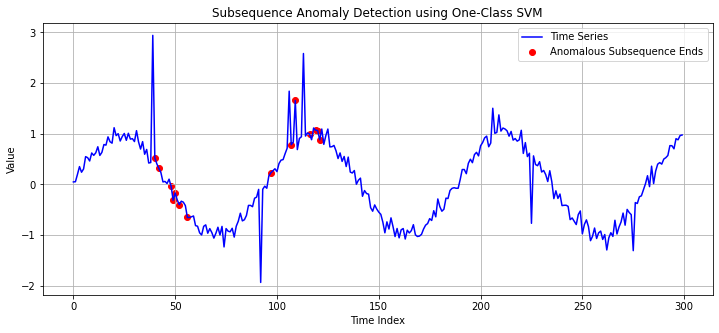

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic time series with injected anomalies
np.random.seed(42)
n = 300
normal_data = np.sin(np.linspace(0, 20, n)) + 0.1 * np.random.randn(n)
anomalies = np.random.uniform(low=-3, high=3, size=10)
anomaly_indices = np.random.choice(n, 10, replace=False)
time_series = normal_data.copy()
time_series[anomaly_indices] = anomalies

# 2. Extract rolling subsequences
window_size = 20
stride = 1

subsequences = []
subseq_indices = []

for i in range(0, len(time_series) - window_size + 1, stride):
    subseq = time_series[i:i + window_size]
    subsequences.append(subseq)
    subseq_indices.append(i + window_size - 1)  # mark the end of the window

subsequences = np.array(subsequences)

# 3. Normalize each subsequence
scaler = StandardScaler()
subsequences_scaled = scaler.fit_transform(subsequences)

# 4. Fit OCSVM model on subsequences
model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
model.fit(subsequences_scaled)

# 5. Get anomaly scores and apply threshold
scores = model.decision_function(subsequences_scaled)  # higher = more normal
threshold = np.quantile(scores, 0.05)  # bottom 5% are anomalies
anomaly_flags = np.where(scores < threshold)[0]

# 6. Plot results
plt.figure(figsize=(12, 5))
plt.plot(time_series, label='Time Series', color='blue')

# Highlight anomaly subsequence *end points*
anomaly_points = [subseq_indices[i] for i in anomaly_flags]
plt.scatter(anomaly_points, time_series[anomaly_points],
            color='red', label='Anomalous Subsequence Ends')

plt.title("Subsequence Anomaly Detection using One-Class SVM")
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
